In [9]:
import mlx.core as mx

array([1, 2], dtype=int32)


# Lazy Execution
The value won't get executed if it's not called. Use `mx.eval(x)` for execution.

In [107]:
# simple way to create array
a = mx.array([1, 2])
print(a)

array([1, 2], dtype=int32)


In [108]:
# float32 type
b = mx.array([1.0, 2.0])
print(b)

array([1, 2], dtype=float32)


In [109]:
d = a + b
mx.eval(d)

# Gradient Function
Using `mx.grad(func)` provides the derivative of that func.

In [48]:
# sin(0) = 0
mx.sin(mx.array(0))

array(0, dtype=float32)

In [46]:
# derivative sin = cos.
# cos(0) = 1
mx.grad(mx.sin)(mx.array(0))

array(1, dtype=int32)

In [56]:
arr = mx.random.normal((100,))
print(arr)
print(arr.shape)

[100]
array([0.110498, -0.425729, 2.38785, ..., 1.99431, -0.367196, -0.128218], dtype=float32)


In [61]:
import time

# Comparison CPU vs. GPU
CPU is much better for small tasks. GPU is better when the array is huge.

In [102]:
a = mx.random.normal((100000,))
b = mx.random.normal((100000,))

In [103]:
start_time = time.time()
mx.eval(mx.matmul(a, b, stream=mx.cpu))
print(f"duration: {time.time() - start_time} s")

duration: 0.02053213119506836 s


In [104]:
start_time = time.time()
mx.eval(mx.matmul(a, b, stream=mx.gpu))
print(f"duration: {time.time() - start_time} s")

duration: 0.0033762454986572266 s


# Stream
All operations are using `stream`, which is the `mx.gpu` or `mx.cpu`. We can set the default using `mx.default_stream(DEVICE)`

In [114]:
mx.default_device()

Device(gpu, 0)

In [115]:
mx.default_stream(mx.default_device())

Stream(Device(gpu, 0), 0)

# Linear Regression

In [200]:
num_features = 100
num_examples = 10
learning_rate = 1e-2

In [201]:
X = mx.random.normal((num_examples, num_features))
y = mx.random.normal((num_examples, 1))
W = mx.random.normal((num_features, 1))

In [202]:
def loss_fn(W):
    # (num_example, num_features) x (num_features, num_output)
    loss = 0.5*mx.mean(mx.square((X @ W  - y)))
    return loss

In [203]:
losses = []
grad_fn = mx.grad(loss_fn)
for _ in range(50):
    # take gradient of the loss w.r.t. W: [dL / dW]
    # This is like automatic dW. So, we don't have to calculate 
    # loss -> W
    grad = grad_fn(W)
    W = W - grad * learning_rate
    mx.eval(W)
    loss = loss_fn(W).item()
    losses.append(loss)

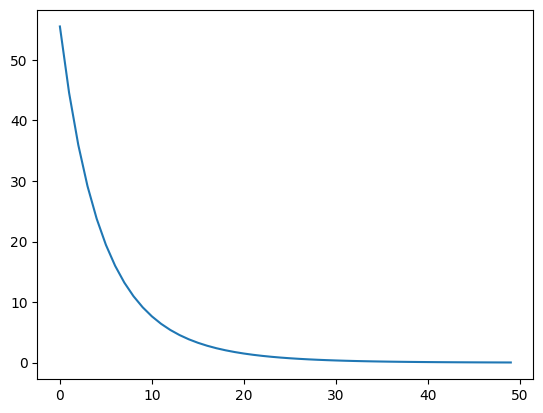

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)